## What is Radom Forest Algorithm?

#### It is constructed using multiple decision trees and the final decision is obtained by majority votes of the decision trees.
#### It takes the majority vote of the trees for classification problems, and the mean for regression problems

---
### Bagging (Bootstrap AGGregatING)

#### In bagging, we split the data into small datasets with less features and less entries
#### The process of selecting features for bootstrap sample is known as Feature Selection 
#### The process of creating rows for subsets is known as random sampling
#### This particular process of creating bootstrap datasets (small subsets) is known as random sampling with replacement (repeated entries)
---

### Working

#### The decision tree algorithm is applied to each bootstrap dataset
#### Feature selection for classification is taken as sqrt for the total number of features in Dataset

---


### Aggregation

#### The sample is tested against each decision tree made and then the votes are tallied

---

## Advantages

#### Low variance
#### Reduce Overfitting (since bootstrapped data is used)
#### No need for normalization since its rule based
#### Highly accurate models are produced
#### Scalable for huge and complex datasets
#### Versatile, can be used for classification and regression
#### Handle missing data by imputing missing values

## Disadvantages

#### High complexity, hard to interpret
#### Computationally expensive to train and evaluate
#### Possible bias towards features with many levels
#### Black box model, difficult to see how the model arrived at its conclusion
#### Imbalanced data does not work well with it, as it prioritizes majority classes

In [2]:
import pandas as pd 
df = pd.read_csv("car.data")

In [6]:
df

,buying,maint,doors,people,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
col_names = ['buying', 'maint', 'doors', 'people', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   people    1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df.describe(include= 'all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
people,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [13]:
for col in col_names:
    print(df[col].value_counts()) 

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
people
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [14]:
df[df.duplicated()]

,buying,maint,doors,people,lug_boot,safety,class


In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']]) 
df['doors'] = oe.fit_transform(df[['doors']]) 
df['people'] = oe.fit_transform(df[['people']]) 
df['lug_boot'] = oe.fit_transform(df[['lug_boot']]) 
df['safety'] = oe.fit_transform(df[['safety']]) 
df['class'] = oe.fit_transform(df[['class']])

In [16]:
df

,buying,maint,doors,people,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()

clf1.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
pred1 = clf1.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print(accuracy_score(pred1, y_test)) 

0.9633911368015414


---

## Validation curve function for hyper parameter tuning

### It varies one parameter while keeping other parameters constant

---

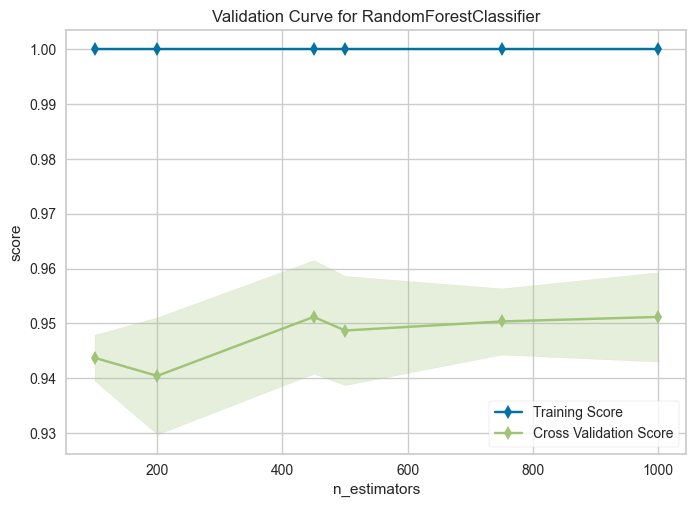

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [27]:
from yellowbrick.model_selection import validation_curve

num_est = [100, 200, 450, 500, 750, 1000]

print(validation_curve(
    RandomForestClassifier(),
    X = X_train, 
    y = y_train, 
    param_name = 'n_estimators', 
    param_range = num_est, 
    scoring = 'accuracy', 
    cv = 3
))

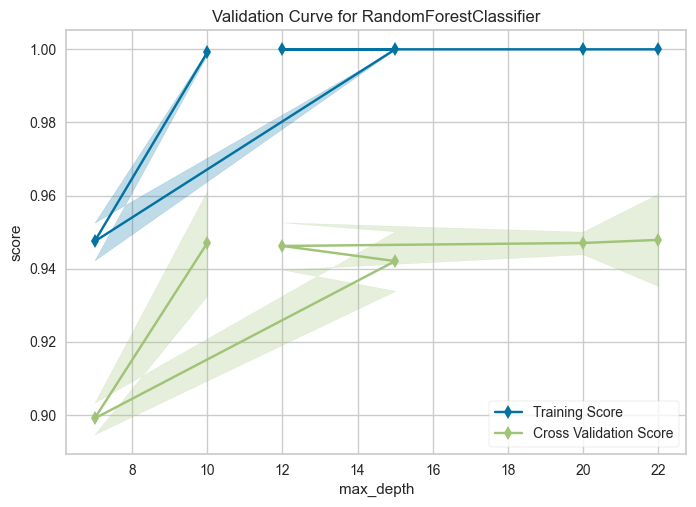

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [28]:
depth_vals = [10, 7, 15, 12, 20, 22]

print(validation_curve(
    RandomForestClassifier(),
    X = X_train, 
    y = y_train, 
    param_name = 'max_depth', 
    param_range = depth_vals, 
    scoring = 'accuracy', 
    cv = 3
))

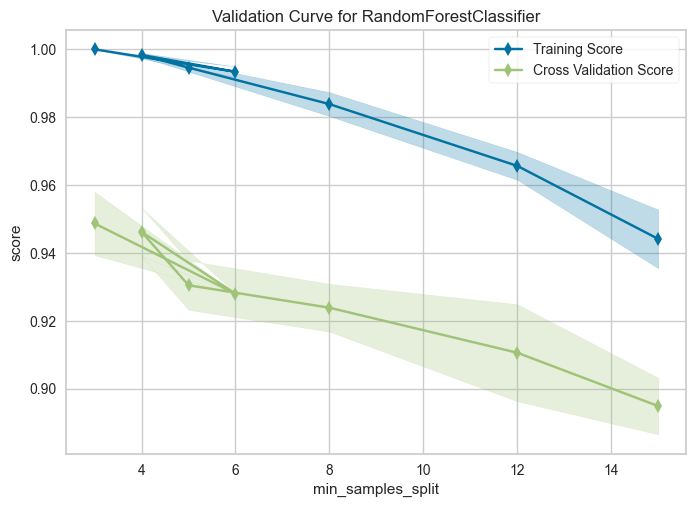

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [29]:
min_samples = [3, 6, 4, 5, 8, 12, 15] 

print(validation_curve(
    RandomForestClassifier(),
    X = X_train, 
    y = y_train, 
    param_name = 'min_samples_split', 
    param_range = min_samples, 
    scoring = 'accuracy', 
    cv = 3
))

In [31]:
clf2 =  RandomForestClassifier(n_estimators=1000, min_samples_split=3, max_depth=22, random_state=0)

clf2.fit(X_train, y_train)

pred2 = clf2.predict(X_test) 
print(accuracy_score(pred2, y_test)) 

0.9653179190751445


--- 

## Feature Importance:

### Calculated using a few ways
####     - Gini Importance (Calculates importance based on how much impurity is reduced on split on that feature)
####      Permutation Importance (Shuffle a feature and see how much the accuracy drops, works on all models)
####      SHAP Values (More advanced, explains how each feaure contributes to a single prediction)

### Advantages:
####    1) Reduces overfitting
####    2) Speeds up training and predictions
####    3) Improves readability 
####    4) Can slightly improve accuracy

---

In [32]:
feature_scores = pd.Series(clf2.feature_importances_, index= X_train.columns).sort_values(ascending = False)
print(feature_scores) 

safety      0.285888
people      0.236649
buying      0.173383
maint       0.149737
lug_boot    0.086017
doors       0.068326
dtype: float64


Text(0.5, 0, 'Feature Importance Score')

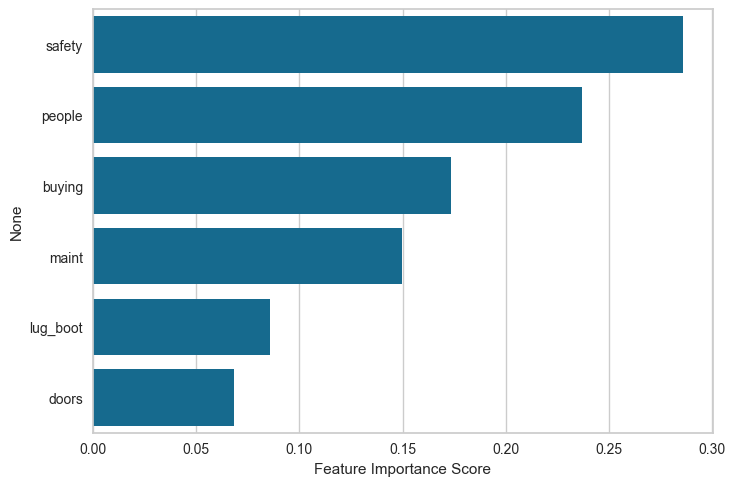

In [33]:
sns.barplot(x = feature_scores, y = feature_scores.index) 
plt.xlabel('Feature Importance Score') 

In [34]:
clf3 = RandomForestClassifier() 

Xn = df.drop(['doors', 'lug_boot', 'maint'], axis = 1) 
Yn = df['class'] 

X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xn, Yn, test_size=0.3) 
clf3.fit(X_trainn, y_trainn) 

new_pred = clf3.predict(X_testn) 

In [35]:
accuracy_score(new_pred, y_testn) 

1.0